In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$ x_i = \frac{a_i*(t_i-t_{i-1})^2}{2} + v_{i-1}*(t_i-t_{i-1}) + x_{i-1} $$

In [2]:
#===================================================
#   First test equation
#===================================================
def get_x1(t):
    return 2*np.power(t, 3) + 3*np.power(t, 2) + 5

def get_v1(t):
    return 6*(np.power(t, 2) + t)

def get_a1(t):
    return 6*(2*t + 1)

#===================================================
#  Second test equation
#===================================================
def get_x2(t):
    return 8*np.exp(-t/3)

def get_v2(t):
    return -8/3*np.exp(-t/3)

def get_a2(t):
    return 8/9*np.exp(-t/3)
#===================================================
#  Third test equation
#===================================================
def get_x3(t):
    return 2*np.log((t+1)/25)

def get_v3(t):
    return 2/(t+1)

def get_a3(t):
    return -2/np.power(t+1, 2)

In [3]:
# metrics
def nrmse(x_true, x_pred):
    return np.sqrt(np.mean(np.power((x_true-x_pred)/x_true, 2)))

In [4]:
def get_x(a, t, x_0 = 1e-15, v_0=1e-15):
    v = np.zeros_like(a)
    x = np.zeros_like(a)
    
    v[0] = v_0
    x[0] = x_0
    
    for i in range(1,len(a)):
        time_step = t[i]-t[i-1]
        v[i] = a[i]*time_step+v[i-1]
        x[i] = a[i]*time_step**2/2 + v[i-1]*time_step + x[i-1]
    return x

In [5]:
t = np.linspace(1, 10, 10000)

NRMSE: 0.00011196


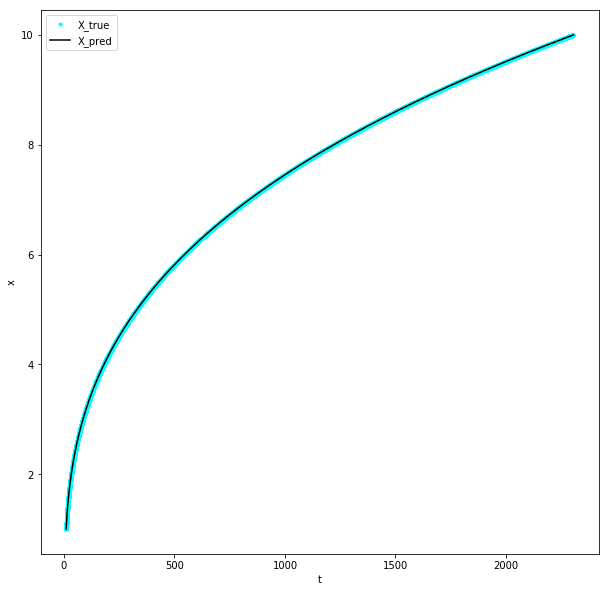

In [6]:
a_1 = get_a1(t)
x_m_1 = get_x(a_1, t, x_0=get_x1(t[0]), v_0=get_v1(t[0]))
x_1 = get_x1(t)
metrics = nrmse(x_1, x_m_1)

print('NRMSE: %s'%(str(metrics)[:10]))

plt.figure(figsize=(10,10))
plt.plot(x_1, t, '.', color='cyan', label='X_true')
plt.plot(x_m_1, t, 'k', label='X_pred')
plt.xlabel('t')
plt.ylabel('x')
plt.legend();

NRMSE: 0.00203191


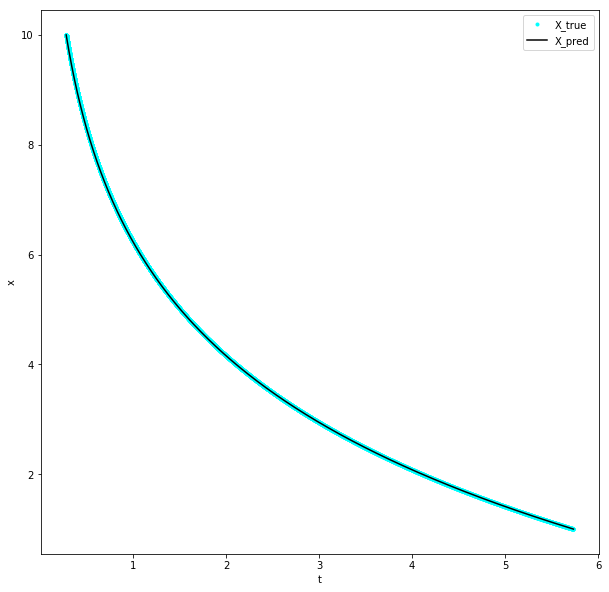

In [7]:
a_2 = get_a2(t)
x_m_2 = get_x(a_2, t, x_0=get_x2(t[0]), v_0=get_v2(t[0]))
x_2 = get_x2(t)
metrics = nrmse(x_2, x_m_2)

print('NRMSE: %s'%(str(metrics)[:10]))

plt.figure(figsize=(10,10))
plt.plot(x_2, t, '.', color='cyan', label='X_true')
plt.plot(x_m_2, t, 'k', label='X_pred')
plt.xlabel('t')
plt.ylabel('x')
plt.legend();

NRMSE: 0.00044799


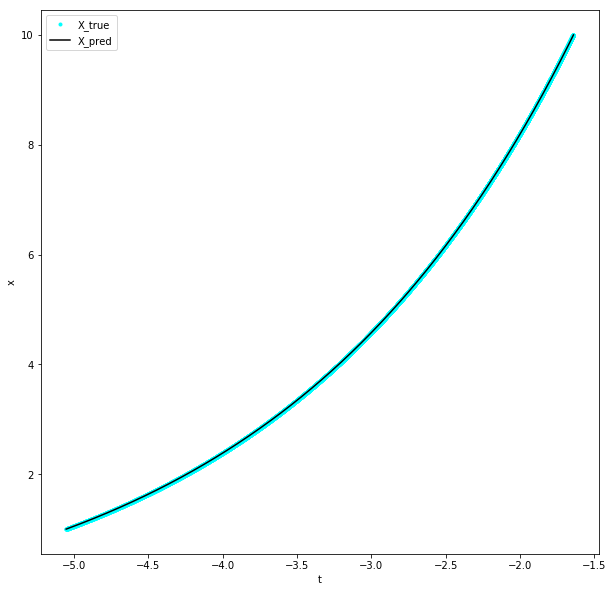

In [8]:
a_3 = get_a3(t)
x_m_3 = get_x(a_3, t, x_0=get_x3(t[0]), v_0=get_v3(t[0]))
x_3 = get_x3(t)
metrics = nrmse(x_3, x_m_3)

print('NRMSE: %s'%(str(metrics)[:10]))

plt.figure(figsize=(10,10))
plt.plot(x_3, t, '.', color='cyan', label='X_true')
plt.plot(x_m_3, t, 'k', label='X_pred')
plt.xlabel('t')
plt.ylabel('x')
plt.legend();